In [32]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import os

In [2]:
# Paths to directories containing data
home_path = os.path.expanduser('~/')
path_67p = home_path+'Documents/year1/shape_modelling/67p/'

In [3]:
# Read in magnitude data
readMikkoData = path_67p+'67p_20230109_I11_R.dat'
mjd = []; mag = []; delta = []; rh = []
f = open(readMikkoData, 'r')
lines = f.readlines()
for line in lines:
    data = line.split()
    mjd.append(float(data[0]))
    mag.append(float(data[1]))
    rh.append(float(data[6]))
    delta.append(float(data[-1]))
    

In [4]:
# Want to calculate apparent magnitude of each observation (R-band)
# H = m - 5log(delta*rh)

m_app = []

for i in range(len(mag)):
    app_mag = mag[i]+(5.*np.log10(delta[i]*rh[i]))
    m_app.append(float('%.4f '%app_mag))
    

In [5]:
# Make into a table for convenient storage and manipulation

data_table = []
np.shape(data_table)

for i in range(len(mjd)):
    data_table.append([mjd[i], mag[i], m_app[i], rh[i], delta[i]])

In [6]:
data_table

[[2459953.840467, 16.4219, 22.4525, 3.95269247, 4.06648345],
 [2459956.844791, 16.2082, 22.2301, 3.96805979, 4.03456631],
 [2459957.799644, 16.3806, 22.3996, 3.97292628, 4.02430962],
 [2459964.820003, 16.2313, 22.2278, 4.00844607, 3.94744209],
 [2459966.849076, 16.2917, 22.2812, 4.01862731, 3.92488936],
 [2459966.853635, 16.2917, 22.2812, 4.01865014, 3.92483812],
 [2459970.80805, 16.2044, 22.18, 4.0383831, 3.88070371],
 [2459970.808461, 16.2041, 22.1797, 4.03838514, 3.88069906],
 [2459970.823103, 16.2074, 22.1829, 4.03845794, 3.88053348],
 [2459970.823931, 16.2087, 22.1842, 4.03846206, 3.88052413],
 [2459972.797099, 16.3591, 22.3275, 4.04825447, 3.85848089],
 [2459973.855214, 16.2973, 22.2619, 4.05349099, 3.84666328],
 [2459977.817678, 16.0415, 21.9915, 4.07301025, 3.80261365],
 [2459978.808516, 16.0823, 22.0286, 4.07786885, 3.79166519],
 [2459979.844439, 16.0716, 22.0141, 4.08293899, 3.78025224],
 [2459980.778005, 16.2659, 22.2049, 4.08749984, 3.77001459],
 [2459984.742117, 16.1934, 2

In [62]:
data_table = np.array(data_table)
data_table[:,2]

array([22.4525, 22.2301, 22.3996, 22.2278, 22.2812, 22.2812, 22.18  ,
       22.1797, 22.1829, 22.1842, 22.3275, 22.2619, 21.9915, 22.0286,
       22.0141, 22.2049, 22.1177, 22.1094, 22.0934, 22.0923, 22.1365,
       22.2138, 22.2911, 22.2729, 21.8714, 21.8737, 21.878 , 21.922 ,
       21.9526, 21.9515, 21.8942, 21.8924, 22.1616, 22.1636, 22.1585,
       22.1577, 21.9689, 21.9356, 22.0446, 22.0085, 21.7993, 21.7165,
       21.7787, 21.8846, 21.9364, 21.8907, 21.8597, 21.5507, 21.595 ,
       21.7967, 21.7587, 21.6996, 21.643 , 21.6416, 21.6064, 21.6035,
       21.5407, 21.5354, 21.4758, 21.429 , 21.4719, 21.4305, 21.4298,
       21.3745, 21.4924, 21.4941, 21.4241, 21.3375, 21.4577, 21.4199,
       21.4067, 21.3728, 21.5128, 21.5478, 21.2932, 21.2536, 21.3733,
       21.573 , 21.5369, 21.4694, 21.4372, 21.5946, 21.5645, 21.6927,
       21.6893, 21.4755, 21.4282, 21.7618, 21.8109, 22.7963, 22.7671,
       22.8059, 22.8101, 22.8478, 22.86  , 22.8436, 22.9351, 22.8578,
       22.7462, 22.7

In [26]:
# Reading in FORS2 app mags and corresponding SNRs

fors_mags = np.arange(19.1,24.3,0.3)
fors_snr = np.array([184.388,144.558,112.606,87.243,67.290,51.712,39.625,30.294,23.118,17.618,13.411,10.201,7.754,5.891,4.474,3.397,2.579,1.957])

In [31]:
# Fit exponential function to these values
def snrFit(x, m, t, b):
    return m * np.exp(-t * x) + b

In [52]:
p0 = (2000, .1, -50)
params, cv = scipy.optimize.curve_fit(snrFit, fors_mags, fors_snr, p0)
m, t, b = params
params

array([ 1.63683321e+09,  8.36990797e-01, -1.30651022e+00])

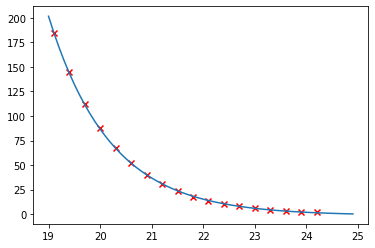

In [53]:
x_test = np.arange(19,25,0.1)
y_test = snrFit(x_test,m,t,b)
plt.plot(x_test,y_test)
plt.scatter(fors_mags,fors_snr, marker='x',color='red')
plt.show()

In [55]:
squaredDiffs = np.square(fors_snr - snrFit(fors_mags, m, t, b))
squaredDiffsFromMean = np.square(fors_snr - np.mean(fors_snr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")
print(f"Y = {m} * e^(-{t} * x) + {b}")

R² = 0.99989581245338
Y = 1636833208.8822763 * e^(-0.8369907968682597 * x) + -1.3065102235974706


In [91]:
snr_list = []
for i in range(len(data_table)):
    snr_list.append(snrFit(data_table[i,2],m,t,b))

snr_list=np.array([snr_list])
data_table = np.append(data_table,np.transpose(snr_list),axis=1)

In [119]:
# Add magnitude uncertainties (1/SNR)
data_table = np.append(data_table, np.transpose([1./data_table[:,5]]), axis=1)

In [128]:
max(data_table[:,-1])

0.3885326223567217